In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math


In [20]:
file = pd.read_csv('all_3.csv',header = None)
feature_names = ['sensor1',
                      'd1max1','d1min1','d1avg1','d1median1','1peak_values1','1peak_times1','1prominence1','d1var1',
                      'd1max2','d1min2','d1avg2','d1median2','1peak_values2','1peak_times2','1prominence2','d1var2',
                      'd1max3','d1min3','d1avg3','d1median3','1peak_values3','1peak_times3','1prominence3','d1var3',
                      'd1max4','d1min4','d1avg4','d1median4','1peak_values4','1peak_times4','1prominence4','d1var4',
                  'sensor2',
                      'd2max1','d2min1','d2avg1','d2median1','2peak_values1','2peak_times1','2prominence1','d2var1',
                      'd2max2','d2min2','d2avg2','d2median2','2peak_values2','2peak_times2','2prominence2','d2var2',
                      'd2max3','d2min3','d2avg3','d2median3','2peak_values3','2peak_times3','2prominence3','d2var3',
                      'd2max4','d2min4','d2avg4','d2median4','2peak_values4','2peak_times4','2prominence4','d2var4',
                  'sensor3',
                      'd3max1','d3min1','d3avg1','d3median1','3peak_values1','3peak_times1','3prominence1','d3var1',
                      'd3max2','d3min2','d3avg2','d3median2','3peak_values2','3peak_times2','3prominence2','d3var2',
                      'd3max3','d3min3','d3avg3','d3median3','3peak_values3','3peak_times3','3prominence3','d3var3',
                      'd3max4','d3min4','d3avg4','d3median4','3peak_values4','3peak_times4','3prominence4','d3var4',
                      'Region','Location_x','Location_y',
                  'compare_avg_ab1','compare_avg_bc1','compare_avg_ca1',
                  'compare_avg_ab2','compare_avg_bc2','compare_avg_ca2',
                  'compare_avg_ab3','compare_avg_bc3','compare_avg_ca3',
                  'compare_avg_ab4','compare_avg_bc4','compare_avg_ca4',
                  'compare_max_ab1','compare_max_bc1','compare_max_ca1',
                  'compare_max_ab2','compare_max_bc2','compare_max_ca2',
                  'compare_max_ab3','compare_max_bc3','compare_max_ca3',
                  'compare_max_ab4','compare_max_bc4','compare_max_ca4']
file.columns = feature_names

In [21]:
Y_region = file['Region'].str.split(' ',n = 1, expand = True)[1].values
Y_region = [int(i) for i in Y_region]
Y_y = file['Location_y'].values
Y_x = file['Location_x'].values
X = file[[ 'd1max1','d1min1','d1avg1','d1median1','1peak_values1','1peak_times1','1prominence1','d1var1',
           'd1max2','d1min2','d1avg2','d1median2','1peak_values2','1peak_times2','1prominence2','d1var2',
           'd1max3','d1min3','d1avg3','d1median3','1peak_values3','1peak_times3','1prominence3','d1var3',
           'd1max4','d1min4','d1avg4','d1median4','1peak_values4','1peak_times4','1prominence4','d1var4',
           'd2max1','d2min1','d2avg1','d2median1','2peak_values1','2peak_times1','2prominence1','d2var1',
           'd2max2','d2min2','d2avg2','d2median2','2peak_values2','2peak_times2','2prominence2','d2var2',
           'd2max3','d2min3','d2avg3','d2median3','2peak_values3','2peak_times3','2prominence3','d2var3',
           'd2max4','d2min4','d2avg4','d2median4','2peak_values4','2peak_times4','2prominence4','d2var4',
           'd3max1','d3min1','d3avg1','d3median1','3peak_values1','3peak_times1','3prominence1','d3var1',
           'd3max2','d3min2','d3avg2','d3median2','3peak_values2','3peak_times2','3prominence2','d3var2',
           'd3max3','d3min3','d3avg3','d3median3','3peak_values3','3peak_times3','3prominence3','d3var3',
           'd3max4','d3min4','d3avg4','d3median4','3peak_values4','3peak_times4','3prominence4','d3var4',
           'compare_avg_ab1','compare_avg_bc1','compare_avg_ca1',
           'compare_avg_ab2','compare_avg_bc2','compare_avg_ca2',
           'compare_avg_ab3','compare_avg_bc3','compare_avg_ca3',
           'compare_avg_ab4','compare_avg_bc4','compare_avg_ca4',
           'compare_max_ab1','compare_max_bc1','compare_max_ca1',
           'compare_max_ab2','compare_max_bc2','compare_max_ca2',
           'compare_max_ab3','compare_max_bc3','compare_max_ca3',
           'compare_max_ab4','compare_max_bc4','compare_max_ca4']].values


Y_xy = []
for i in range(0,len(Y_x)):
    Y_xy.append([Y_x[i],Y_y[i]])
(X_train,X_test,Y_region_train,Y_region_test,Y_y_train,Y_y_test,Y_x_train,Y_x_test,Y_xy_train,Y_xy_test)=train_test_split(X, Y_region, Y_y, Y_x, Y_xy, test_size=0.3)   


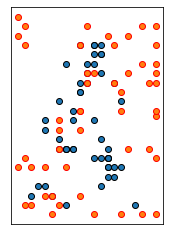

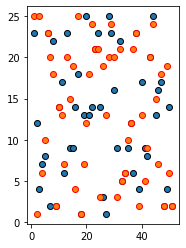

In [22]:

num_estimators =100 #[10,20,30,40,50,60,70,80,90,100,110,120]
num_features = 50 #[10,20,30,40,50,60,70,80,90,100,110,120]

Bagged_region = BaggingClassifier(n_estimators=num_estimators ,max_features=num_features,  warm_start=False, random_state=0)
Bagged_region.fit(X_train, Y_region_train)
Bagged_x = BaggingRegressor( n_estimators=num_estimators ,max_features=num_features,  warm_start=False, random_state=0)
Bagged_x.fit(X_train, Y_x_train)
Bagged_y = BaggingRegressor( n_estimators=num_estimators , max_features=num_features,  warm_start=False, random_state=0)
Bagged_y.fit(X_train, Y_y_train)

Y_region_pred_test = Bagged_region.predict(X_test)
Y_region_pred_test= [int (i) for i in Y_region_pred_test]
Y_x_pred_test = Bagged_x.predict(X_test)
Y_x_pred_test= [int (i)//10*10 for i in Y_x_pred_test]
Y_y_pred_test = Bagged_y.predict(X_test)
Y_y_pred_test= [int (i)//10*10 for i in Y_y_pred_test]



Y_region_pred_train = Bagged_region.predict(X_train)
Y_region_pred_train= [int (i) for i in Y_region_pred_train]
Y_x_pred_train = Bagged_x.predict(X_train)
Y_x_pred_train= [int (i)//10*10 for i in Y_x_pred_train]
Y_y_pred_train = Bagged_y.predict(X_train)
Y_y_pred_train= [int (i)//10*10 for i in Y_y_pred_train]

plt.subplot(1, 2, 1)
plt.scatter(Y_x_pred_test, Y_y_pred_test,cmap=plt.cm.Set1,edgecolor='k')
plt.scatter(Y_x_test, Y_y_test,cmap=plt.cm.Set2,edgecolor='r')
plt.xticks(())
plt.yticks(())
plt.show()

plt.subplot(1, 2, 2)
num = [i for i in range(1,len(Y_region_pred_test)+1)]
plt.scatter(num,Y_region_pred_test,edgecolor='k')
plt.scatter(num,Y_region_test,edgecolor='r')



Bagged_xy = BaggingRegressor( n_estimators=num_estimators , max_features=num_features,  warm_start=False, random_state=0)
Bagged_xy.fit(X_train, Y_xy_train)
Y_xy_pred_test = Bagged_xy.predict(X_test)
Y_xy_pred_train = Bagged_xy.predict(X_train)
for i in range(0,len(Y_xy_pred_test)):
    Y_xy_pred_test[i][0] = int(Y_xy_pred_test[i][0])
    Y_xy_pred_test[i][1] = int(Y_xy_pred_test[i][1])
    

In [23]:
#x and y
thre_test = 40
accuracy_test = 0
rsme_test = 0
for i in range(0,len(Y_x_pred_test)):
    rsme_test += (Y_x_pred_test[i]-Y_x_test[i])*(Y_x_pred_test[i]-Y_x_test[i]) + (Y_y_pred_test[i]-Y_y_test[i])*(Y_y_pred_test[i]-Y_y_test[i])
    if abs(Y_x_pred_test[i]-Y_x_test[i]) <= thre_test and abs(Y_y_pred_test[i]-Y_y_test[i]) <= thre_test:
        accuracy_test += 1
accuracy_test = accuracy_test/len(Y_x_pred_test)*100
rsme_test = math.sqrt(rsme_test / len(Y_x_pred_test) / 2)
print("X_Y TEST Accuracy is %.2f"%accuracy_test, "% in threshold",thre_test)
print("X_Y TEST RSME is ",rsme_test)
        
        

X_Y TEST Accuracy is 49.02 % in threshold 40
X_Y TEST RSME is  49.80599617417526


In [24]:
#xy
thre_test = 40
accuracy_test = 0
rsme_test = 0
for i in range(0,len(Y_xy_pred_test)):
    rsme_test += (Y_xy_pred_test[i][0]-Y_xy_test[i][0])*(Y_xy_pred_test[i][0]-Y_xy_test[i][0]) + (Y_xy_pred_test[i][1]-Y_xy_test[i][1])*(Y_xy_pred_test[i][1]-Y_xy_test[i][1])
    if abs(Y_xy_pred_test[i][0]-Y_xy_test[i][0]) <= thre_test and abs(Y_xy_pred_test[i][1]-Y_xy_test[i][1]) <= thre_test:
        accuracy_test += 1
accuracy_test = accuracy_test/len(Y_x_pred_test)*100
rsme_test = math.sqrt(rsme_test / len(Y_x_pred_test) / 2)
print("XY TEST Accuracy is %.2f"%accuracy_test, "% in threshold",thre_test)
print("XY TEST RSME is ",rsme_test)

XY TEST Accuracy is 37.25 % in threshold 40
XY TEST RSME is  49.48905602925425


In [25]:
#x and y
thre_train = 40
accuracy_train = 0
rsme_train = 0
for i in range(0,len(Y_x_pred_train)):
    rsme_train += (Y_x_pred_train[i]-Y_x_train[i])*(Y_x_pred_train[i]-Y_x_train[i]) + (Y_y_pred_train[i]-Y_y_train[i])*(Y_y_pred_train[i]-Y_y_train[i])
    if abs(Y_x_pred_train[i]-Y_x_train[i]) <= thre_train and abs(Y_y_pred_train[i]-Y_y_train[i]) <= thre_train:
        accuracy_train += 1
accuracy_train = accuracy_train/len(Y_x_pred_train)*100
rsme_train = math.sqrt(rsme_train / len(Y_x_pred_train) / 2)
print("X_Y TRAIN Accuracy is %.2f"%accuracy_train, "% in threshold",thre_train)
print("X_Y TRAIN RSME is ",rsme_train)
        

X_Y TRAIN Accuracy is 99.15 % in threshold 40
X_Y TRAIN RSME is  19.075759890096524


In [26]:
# xy
thre_train = 40
accuracy_train = 0
rsme_train = 0
for i in range(0,len(Y_xy_pred_train)):
    rsme_train += (Y_xy_pred_train[i][0]-Y_xy_train[i][0])*(Y_xy_pred_train[i][0]-Y_xy_train[i][0]) + (Y_xy_pred_train[i][1]-Y_xy_train[i][1])*(Y_xy_pred_train[i][1]-Y_xy_train[i][1])
    if abs(Y_xy_pred_train[i][0]-Y_xy_train[i][0]) <= thre_train and abs(Y_xy_pred_train[i][1]-Y_xy_train[i][1]) <= thre_train:
        accuracy_train += 1
accuracy_train = accuracy_train/len(Y_x_pred_train)*100
rsme_train = math.sqrt(rsme_train / len(Y_x_pred_train) / 2)
print("XY TRAIN Accuracy is %.2f"%accuracy_train, "% in threshold",thre_train)
print("XY TRAIN RSME is ",rsme_train)
        

XY TRAIN Accuracy is 94.02 % in threshold 40
XY TRAIN RSME is  18.459161195766242


In [27]:
accuracy_test = 0
accuracy_train = 0

for i in range(0,len(Y_region_pred_train)):
    if Y_region_pred_train[i] == Y_region_train[i]:
        accuracy_train += 1
accuracy_train = accuracy_train/len(Y_region_pred_train)*100

for i in range(0,len(Y_region_pred_test)):
    if Y_region_pred_test[i] == Y_region_test[i]:
        accuracy_test += 1
accuracy_test = accuracy_test/len(Y_region_pred_test)*100

print("Region TRAIN Accuracy is %.2f"%accuracy_train, "%")
print("Region TEST Accuracy is %.2f"%accuracy_test, "%")

Region TRAIN Accuracy is 100.00 %
Region TEST Accuracy is 23.53 %
